# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('ElectricCarData_Clean.csv')    # import csv file
data.head(100) 

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Volkswagen,ID.3 Pro Performance,7.3,160,340,171,470,Yes,RWD,Type 2 CCS,Hatchback,C,5,35575
96,Kia,e-Soul 39 kWh,9.9,157,230,170,220,Yes,FWD,Type 2 CCS,SUV,B,5,33133
97,Byton,M-Byte 72 kWh 2WD,7.5,190,325,222,420,Yes,RWD,Type 2 CCS,SUV,E,5,53500
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000


In [3]:
data.shape

(103, 14)

In [4]:
data.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [5]:
data.columns=[column.lower().replace(' ', '_') for column in data.columns]
data.columns

Index(['brand', 'model', 'accelsec', 'topspeed_kmh', 'range_km',
       'efficiency_whkm', 'fastcharge_kmh', 'rapidcharge', 'powertrain',
       'plugtype', 'bodystyle', 'segment', 'seats', 'priceeuro'],
      dtype='object')

# 1. Cleaning 

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            103 non-null    object 
 1   model            103 non-null    object 
 2   accelsec         103 non-null    float64
 3   topspeed_kmh     103 non-null    int64  
 4   range_km         103 non-null    int64  
 5   efficiency_whkm  103 non-null    int64  
 6   fastcharge_kmh   103 non-null    object 
 7   rapidcharge      103 non-null    object 
 8   powertrain       103 non-null    object 
 9   plugtype         103 non-null    object 
 10  bodystyle        103 non-null    object 
 11  segment          103 non-null    object 
 12  seats            103 non-null    int64  
 13  priceeuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [7]:
data.shape

(103, 14)

In [8]:
data.isna().sum()

brand              0
model              0
accelsec           0
topspeed_kmh       0
range_km           0
efficiency_whkm    0
fastcharge_kmh     0
rapidcharge        0
powertrain         0
plugtype           0
bodystyle          0
segment            0
seats              0
priceeuro          0
dtype: int64

In [9]:
data.describe()

,accelsec,topspeed_kmh,range_km,efficiency_whkm,seats,priceeuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [10]:
data.shape

(103, 14)

# 1.1 Changing price from Euro to US Dollars

I swap the prices from Euro to US Dollars using exchange rate of 17/05/2021.

1 € = 1.22 $

In [11]:
data['priceeuro'] = 1.22 * data['priceeuro']

In [12]:
data['priceeuro']

0       67685.60
1       36600.00
2       68856.80
3       83008.80
4       40256.34
         ...    
98      54900.00
99     117181.00
100     61000.00
101     79300.00
102     75640.00
Name: priceeuro, Length: 103, dtype: float64

In [13]:
data.describe()

,accelsec,topspeed_kmh,range_km,efficiency_whkm,seats,priceeuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,68090.106990
std,3.017430,43.573030,126.014444,29.566839,0.795834,41644.291642
min,2.100000,123.000000,95.000000,104.000000,2.000000,24557.380000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,42003.990000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,54900.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,79300.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,262300.000000


In [14]:
# Rename the column 'priceeuro'

data.columns = ['brand', 'model', 'accelsec', 'topspeed_kmh', 'range_km',
       'efficiency_whkm', 'fastcharge_kmh', 'rapidcharge', 'powertrain',
       'plugtype', 'bodystyle', 'segment', 'seats', 'price']

In [15]:
data.head()

,brand,model,accelsec,topspeed_kmh,range_km,efficiency_whkm,fastcharge_kmh,rapidcharge,powertrain,plugtype,bodystyle,segment,seats,price
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,67685.60
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,36600.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,68856.80
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,83008.80
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,40256.34


In [16]:
# export cleaned dataframe to csv that will be used in Tableau
data.to_csv('Tableau_EV.csv')

# 2. Exploratory Data Analysis

## Heatmap

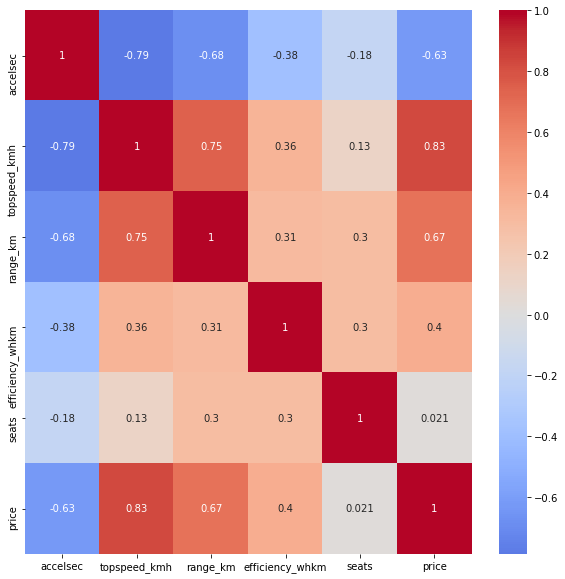

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(data.corr(),  # the data for the heatmap, our dataframe
            annot=True,  # show the actual values of correlation in the map
            cmap='coolwarm',  # provide the 'coolwarm' colormap for the heatmap
            center=0,  # specify the value at which to center the colormap, we set it to zero, so negative correlations are displayed as negatives
           )
plt.show()

## Scatter Plots

Scatter plot Price and Top Speed

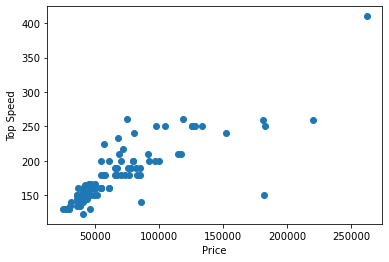

In [20]:
plt.scatter(x=data['price'],y=data['topspeed_kmh'])
plt.xlabel('Price')
plt.ylabel('Top Speed')
plt.show()

Scatter plot Price and range in KM

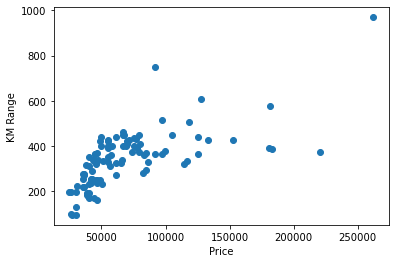

In [21]:
plt.scatter(x=data['price'],y=data['range_km'])
plt.xlabel('Price')
plt.ylabel('KM Range')
plt.show()

Scatter plot Price and Efficiency

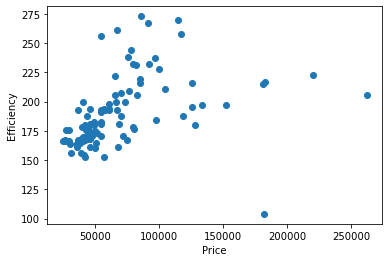

In [23]:
plt.scatter(x=data['price'],y=data['efficiency_whkm'])
plt.xlabel('Price')
plt.ylabel('Efficiency')
plt.show()

## Distribution Charts

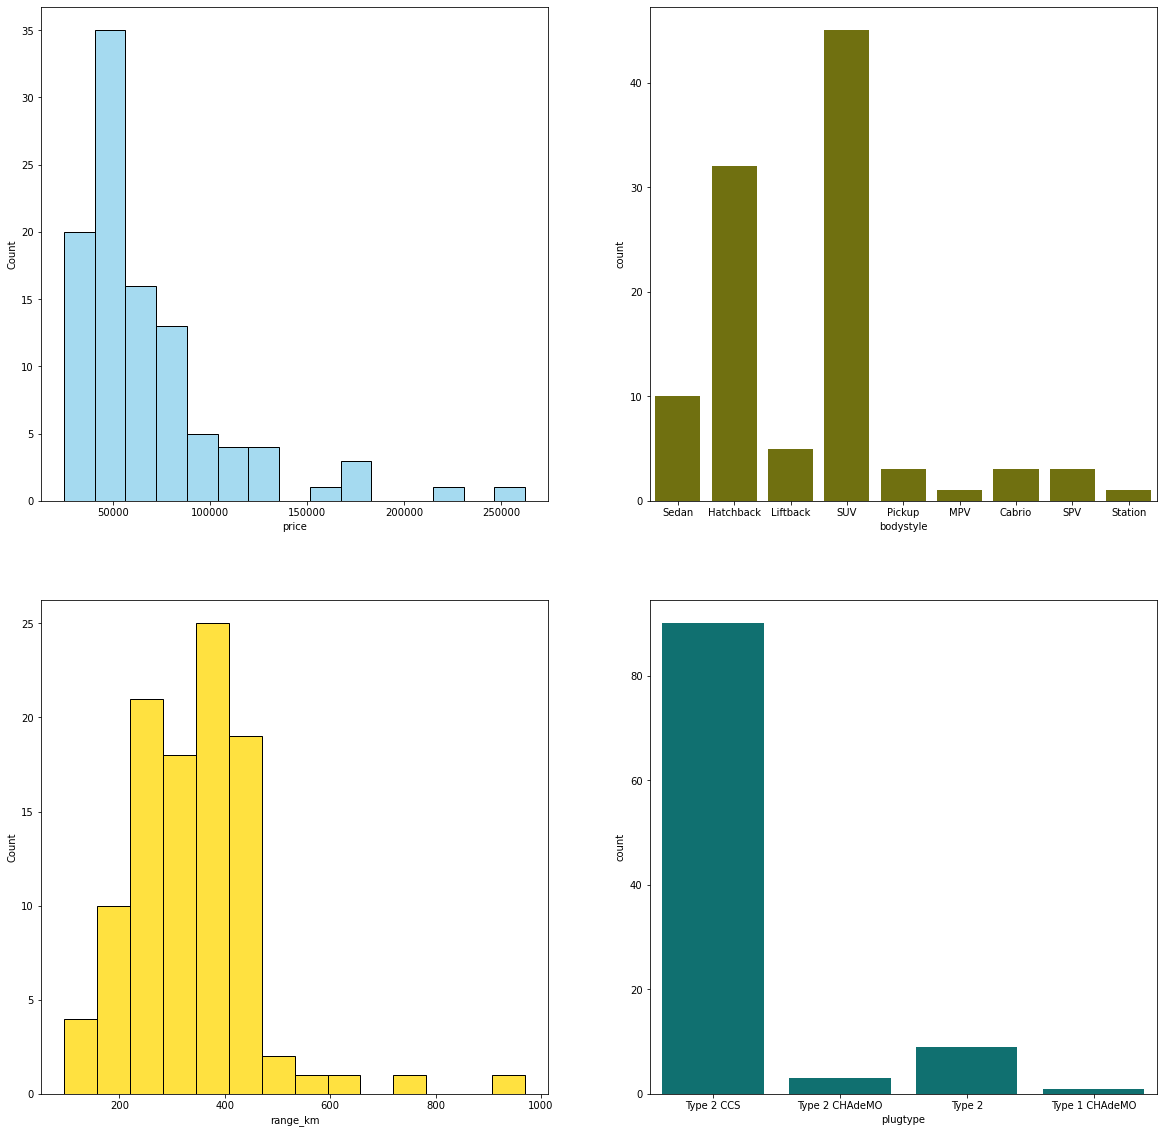

In [24]:
f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=False);
sns.histplot(x=data["price"] , color="skyblue", ax=axes[0, 0]);
sns.countplot(x=data["bodystyle"] , color="olive", ax=axes[0, 1]);
sns.histplot(x=data["range_km"], color="gold", ax=axes[1, 0]);
sns.countplot(x=data["plugtype"] , color="teal", ax=axes[1, 1]);

# 3. Addtional Wrangling/Cleaning

In [25]:
data.dtypes

brand               object
model               object
accelsec           float64
topspeed_kmh         int64
range_km             int64
efficiency_whkm      int64
fastcharge_kmh      object
rapidcharge         object
powertrain          object
plugtype            object
bodystyle           object
segment             object
seats                int64
price              float64
dtype: object

In [26]:
numericals = data.select_dtypes(np.number)
numericals.head()

,accelsec,topspeed_kmh,range_km,efficiency_whkm,seats,price
0,4.6,233,450,161,5,67685.60
1,10.0,160,270,167,5,36600.00
2,4.7,210,400,181,5,68856.80
3,6.8,180,360,206,5,83008.80
4,9.5,145,170,168,4,40256.34


# 4. Modelling

### Split data into dependent and independent variables

In [28]:
X = numericals.drop(columns="price")
y = numericals.price

### Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Test Train Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.1,random_state= 40)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

Training Set: 92
Test Set: 11
Training labels: 92
Test labels: 11


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Fitting the training data into the linear regression model

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# A predicition array is presented
predictions  = lin_model.predict(X_test)
predictions

array([ 33591.54919926,  70170.44566959, 130666.22952023,  47133.23214113,
        27847.42441615,  90335.31855166,  71914.62142074,  37942.42848209,
       121199.96576645, 123172.7998644 ,  53455.11525779])

In [35]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.7173541961003171

In [36]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(mse)

274320698.164149


In [37]:
# Root Mean Square Error
import math 
rmse = math.sqrt(mse)
print(rmse)

16562.6295667128


### Comparing predicted prices vs actual prices

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

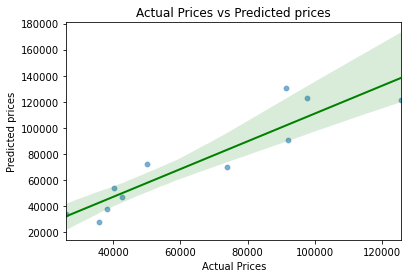

In [38]:
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
